In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def get_quantile(df, q_num=4):
    d = df.copy()
    d['Q'] = pd.qcut(d['mean'], q_num, labels=False)
    return d

In [3]:
def get_grouped_desc_2(file):
    desc = pd.read_csv(file, sep=';', index_col='id', skipinitialspace=True)
    desc.head()
    
    volume = desc[desc['desc'].str.match('Volume')]
    area = desc[desc['desc'].str.match('Area')]
    grey_white = desc[desc['desc'].str.match('Grey-white')]
    mean_thickness = desc[desc['desc'].str.match('Mean thickness')]
    mean_intensity = desc[desc['desc'].str.match('Mean intensity')]

    return {
            'volume':volume, 
            'area':area, 
            'grey white':grey_white, 
            'mean thickness':mean_thickness,
            'mean intensity': mean_intensity}

In [4]:
def get_grouped_desc(desc_file, multi_r2, multi_mse, name='result', write_result=False):
    desc = pd.read_csv(desc_file, index_col='id')
    r2 = pd.read_csv(multi_r2).iloc[[-1]].T # select the last entry
    mse = pd.read_csv(multi_mse).iloc[[-1]].T

    mse.columns =['mse']
    mse.index.name = 'id'
    mse.index = mse.index.astype(int)

    r2.columns=['r2']
    r2.index.name = 'id'
    r2.index = r2.index.astype(int)

    joined = r2.join(mse, on='id', how='left')
    desc = desc.join(joined, on='id', how='left')

    if write_result:
        desc.to_csv('results/'+name+'.csv', sep=';',doublequote=False, escapechar='\t')

    volume = desc[desc['desc'].str.match('Volume')]
    area = desc[desc['desc'].str.match('Area')]
    grey_white = desc[desc['desc'].str.match('Grey-white')]
    mean_thickness = desc[desc['desc'].str.match('Mean thickness')]
    mean_intensity = desc[desc['desc'].str.match('Mean intensity')]

    # print('total : {}'.format(volume.shape[0] + area.shape[0] + grey_white.shape[0] + mean_thickness.shape[0] + mean_intensity.shape[0]))
    return {
        'volume':volume, 
        'area':area, 
        'grey white':grey_white, 
        'mean thickness':mean_thickness,
        'mean intensity': mean_intensity}

In [5]:
desc_file = '../csv/idps_desc.csv'

In [6]:
multi_r2 = 'sfcn_pyramid_avg_plat_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_avg_plat_test_multi_mse.csv'
sfcn_pyr_avg = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [7]:
multi_r2 = 'sfcn_pyramid_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_test_multi_mse.csv'
sfcn_pyr = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [8]:
multi_r2 = 'sfcn_vanilla_test_multi_r2.csv'
multi_mse = 'sfcn_vanilla_test_multi_mse.csv'
sfcn_vanilla = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [9]:
multi_r2 = 'sfcn_pyramid_nopool_v2_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_nopool_v2_test_multi_mse.csv'
sfcn_nopool = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [10]:
multi_r2 = 'sfcn_pyramid_nopool_test_multi_r2.csv'
multi_mse = 'sfcn_pyramid_nopool_test_multi_mse.csv'
sfcn_nopool2 = get_grouped_desc(desc_file, multi_r2, multi_mse)

In [11]:
def boxplot(result_list, names, q_num=4, group='volume'):
    q = list()
    for i in range(len(result_list)):
        df = get_quantile(result_list[i][group], q_num=q_num)
        df['model'] = names[i]
        q.append(df[['r2', 'mse', 'Q', 'model']].reset_index(drop=True))

    ret = q[0]
    for i in range(1, len(q)):
        ret = pd.concat([ret, q[i]], axis=0)
    
    fig, ax = plt.subplots(ncols=1, nrows=2)

    sns.boxplot(data=ret, x='Q', y='r2', hue='model', ax=ax[0])
    sns.boxplot(data=ret, x='Q', y='mse', hue='model', ax=ax[1])   

    fig.set_size_inches(10,8)    
    fig.suptitle(group)
    return ret

In [12]:
sfcn_vanilla = get_grouped_desc_2('sfcn_alex.csv')

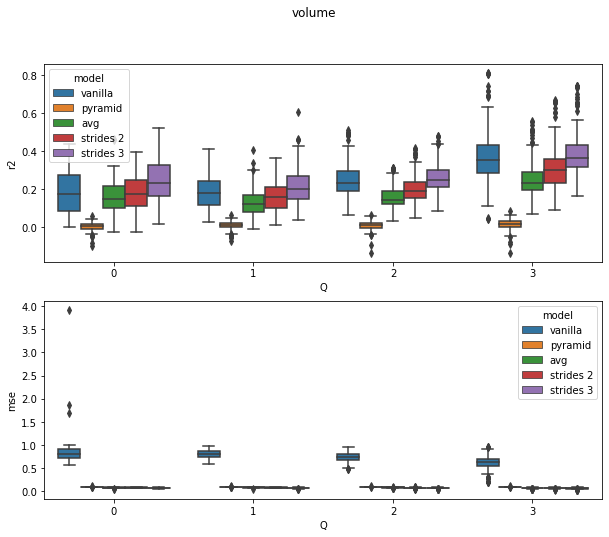

In [13]:
a = boxplot([sfcn_vanilla, sfcn_pyr, sfcn_pyr_avg, sfcn_nopool, sfcn_nopool2], ['vanilla', 'pyramid' ,'avg', 'strides 2', 'strides 3'])


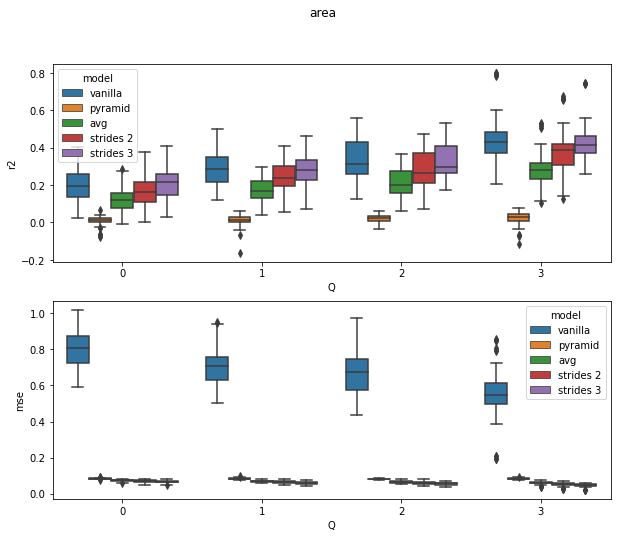

In [14]:
a = boxplot([sfcn_vanilla, sfcn_pyr, sfcn_pyr_avg, sfcn_nopool, sfcn_nopool2], ['vanilla', 'pyramid' ,'avg', 'strides 2', 'strides 3'], group='area')


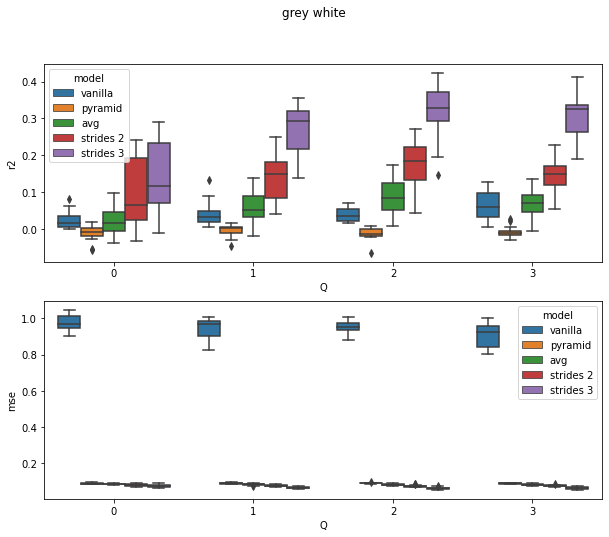

In [15]:
a = boxplot([sfcn_vanilla, sfcn_pyr, sfcn_pyr_avg, sfcn_nopool, sfcn_nopool2], ['vanilla', 'pyramid' ,'avg', 'strides 2', 'strides 3'], group='grey white')


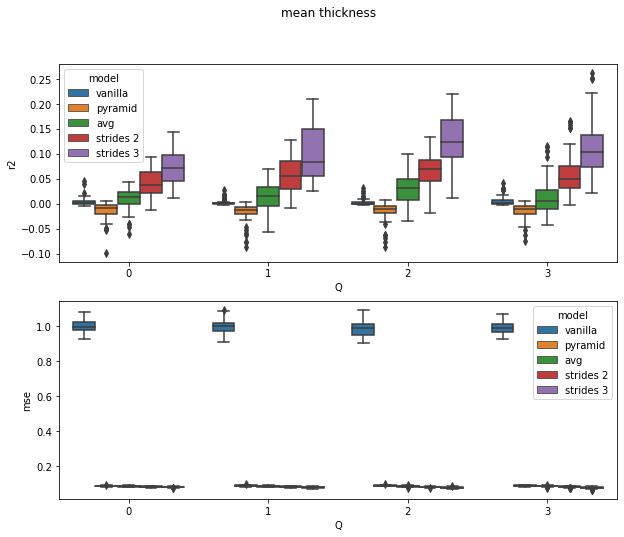

In [16]:
a = boxplot([sfcn_vanilla, sfcn_pyr, sfcn_pyr_avg, sfcn_nopool, sfcn_nopool2], ['vanilla', 'pyramid' ,'avg', 'strides 2', 'strides 3'], group='mean thickness')


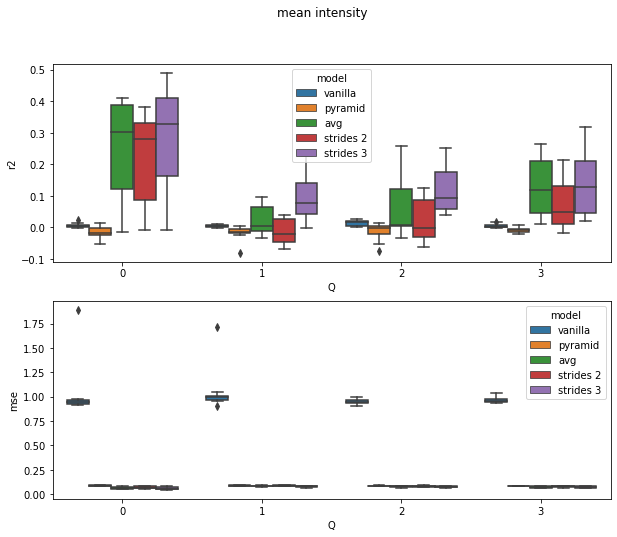

In [17]:
a = boxplot([sfcn_vanilla, sfcn_pyr, sfcn_pyr_avg, sfcn_nopool, sfcn_nopool2], ['vanilla', 'pyramid' ,'avg', 'strides 2', 'strides 3'], group='mean intensity')


In [18]:
a = pd.read_csv('sfcn_alex.csv', delimiter=';', index_col='id', skipinitialspace=True)

In [20]:
a.mean()

/tmp/ipykernel_3846833/1798845826.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  a.mean()


mean    8979.259036
r2         0.194696
mse        0.799086
dtype: float64